In [2]:
import skimage.io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage
import skimage.measure
import skimage.feature
# import imutils

%matplotlib inline

In [3]:
def imshow(*argl, **argm):
    plt.figure(figsize=(20,10))
    skimage.io.imshow(*argl, **argm)

In [4]:
a=skimage.io.imread('demo1.png')
b=skimage.io.imread('demo2.png')

In [6]:
orb = cv2.BRISK()
kp1, des1 = orb.detectAndCompute(a, None)
kp2, des2 = orb.detectAndCompute(b, None)
kp1 = np.array([kp.pt for kp in kp1])
kp2 = np.array([kp.pt for kp in kp2])

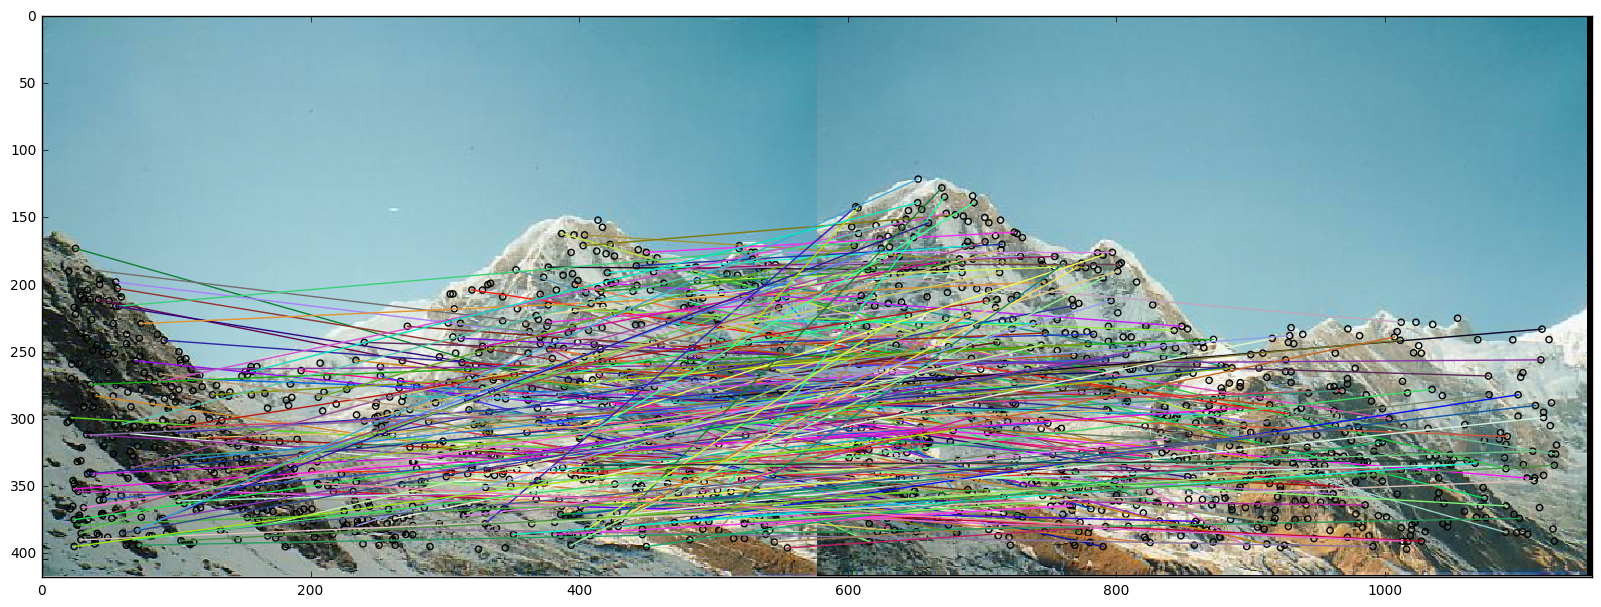

In [7]:
matches = skimage.feature.match_descriptors(des1, des2, cross_check=True)
plt.figure(figsize=(20,10))
skimage.feature.plot_matches(plt.axes(), a, b, kp1[:,::-1], kp2[:,::-1], matches)

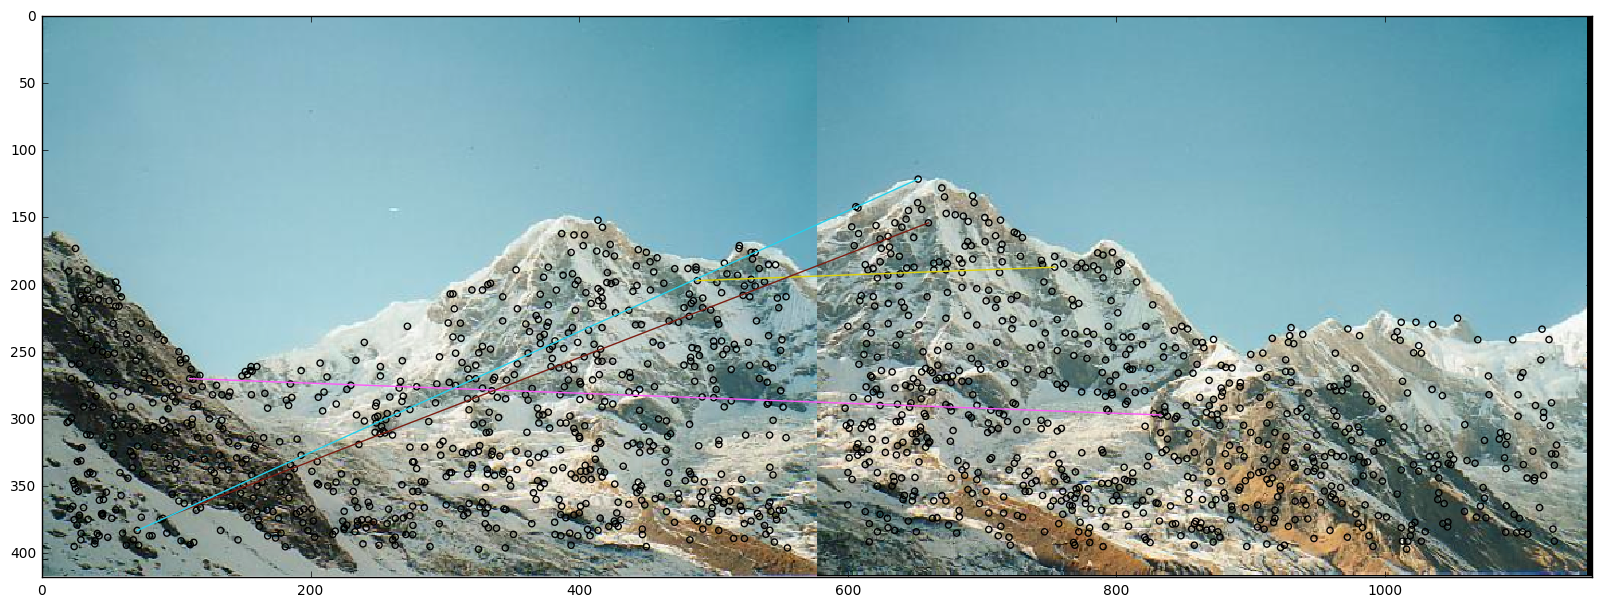

In [8]:
btransform, good_matches = skimage.measure.ransac([kp1[matches[:,0],:],kp2[matches[:,1],:]], model_class=skimage.transform.ProjectiveTransform, min_samples=5,residual_threshold=0.8)
good_matches = matches[good_matches]
plt.figure(figsize=(20,10))
skimage.feature.plot_matches(plt.axes(), a, b, kp1[:,::-1], kp2[:,::-1], good_matches)

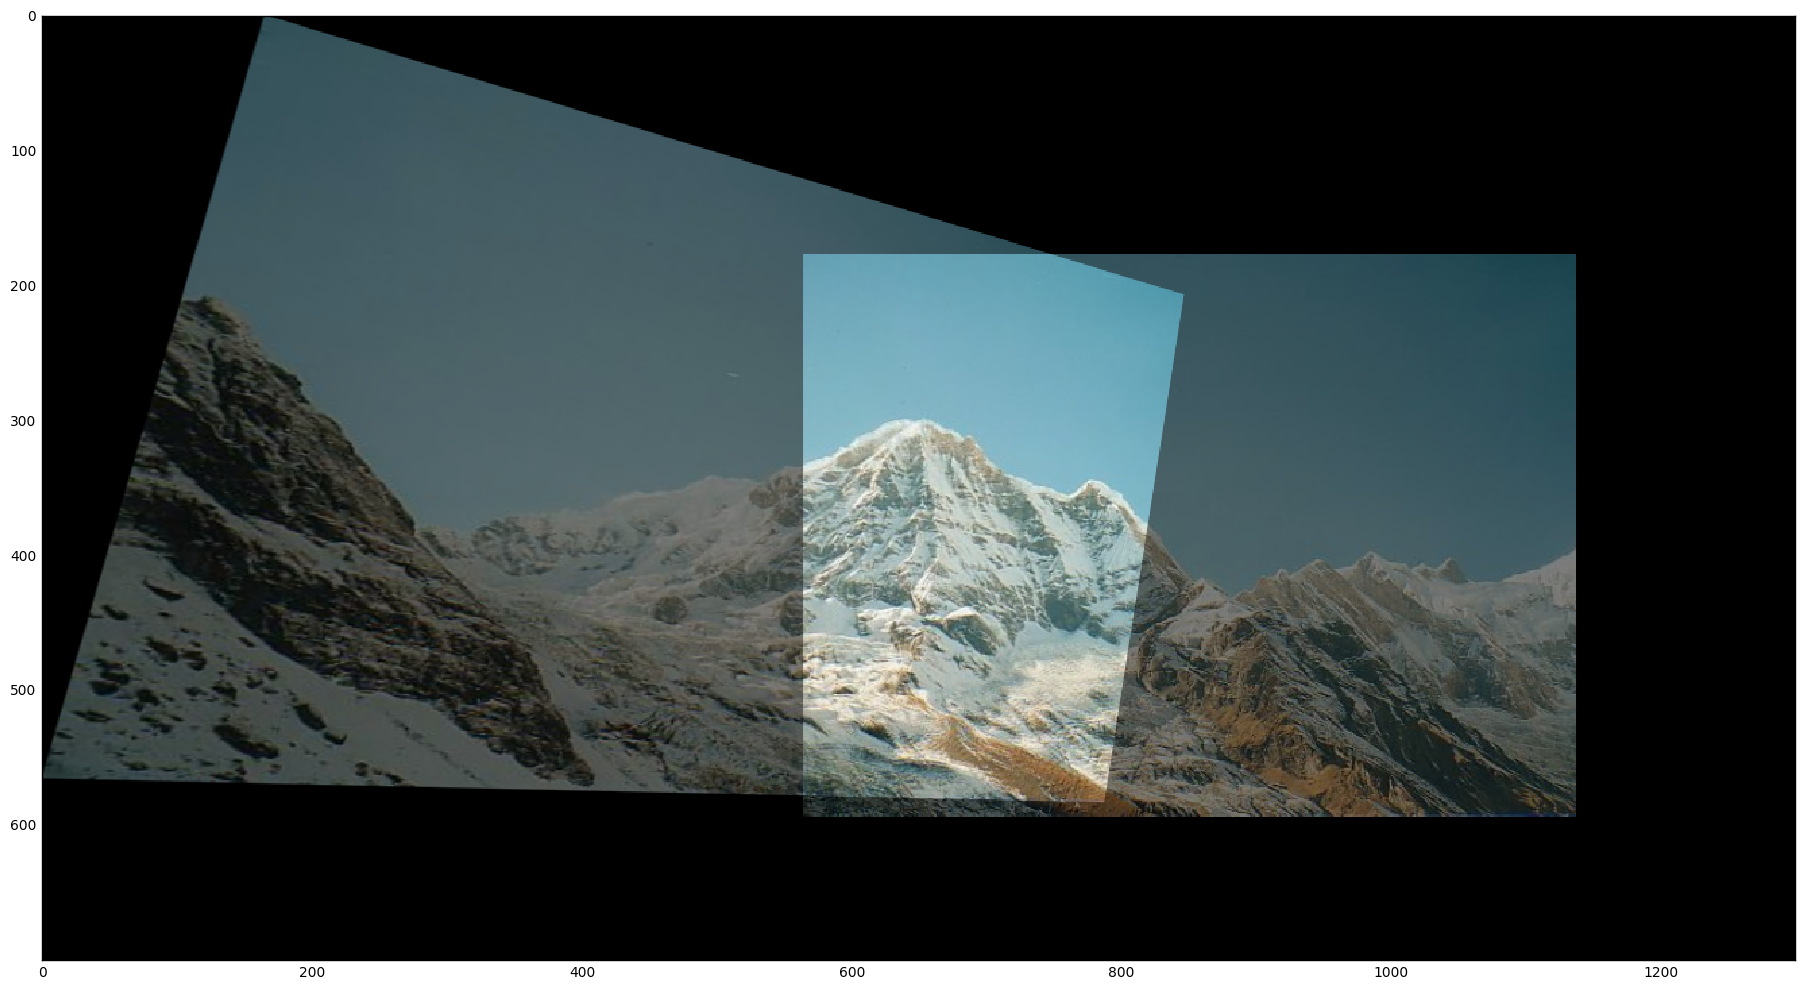

In [30]:
r, c = a.shape[:2]
corners = np.array([[0, 0], [0, r], [c, 0],[c, r]])
warped_corners = btransform(corners)
all_corners = np.vstack((warped_corners, corners))
offset = (-np.min(all_corners[:, 0], axis=0), -np.min(all_corners[:, 1], axis=0))
offset = skimage.transform.SimilarityTransform(translation=offset)

na = skimage.transform.warp(a, (btransform + offset).inverse, output_shape=(700, 1300))
nb = skimage.transform.warp(b, offset.inverse, output_shape=(700, 1300))
imshow((na+nb)/2)
